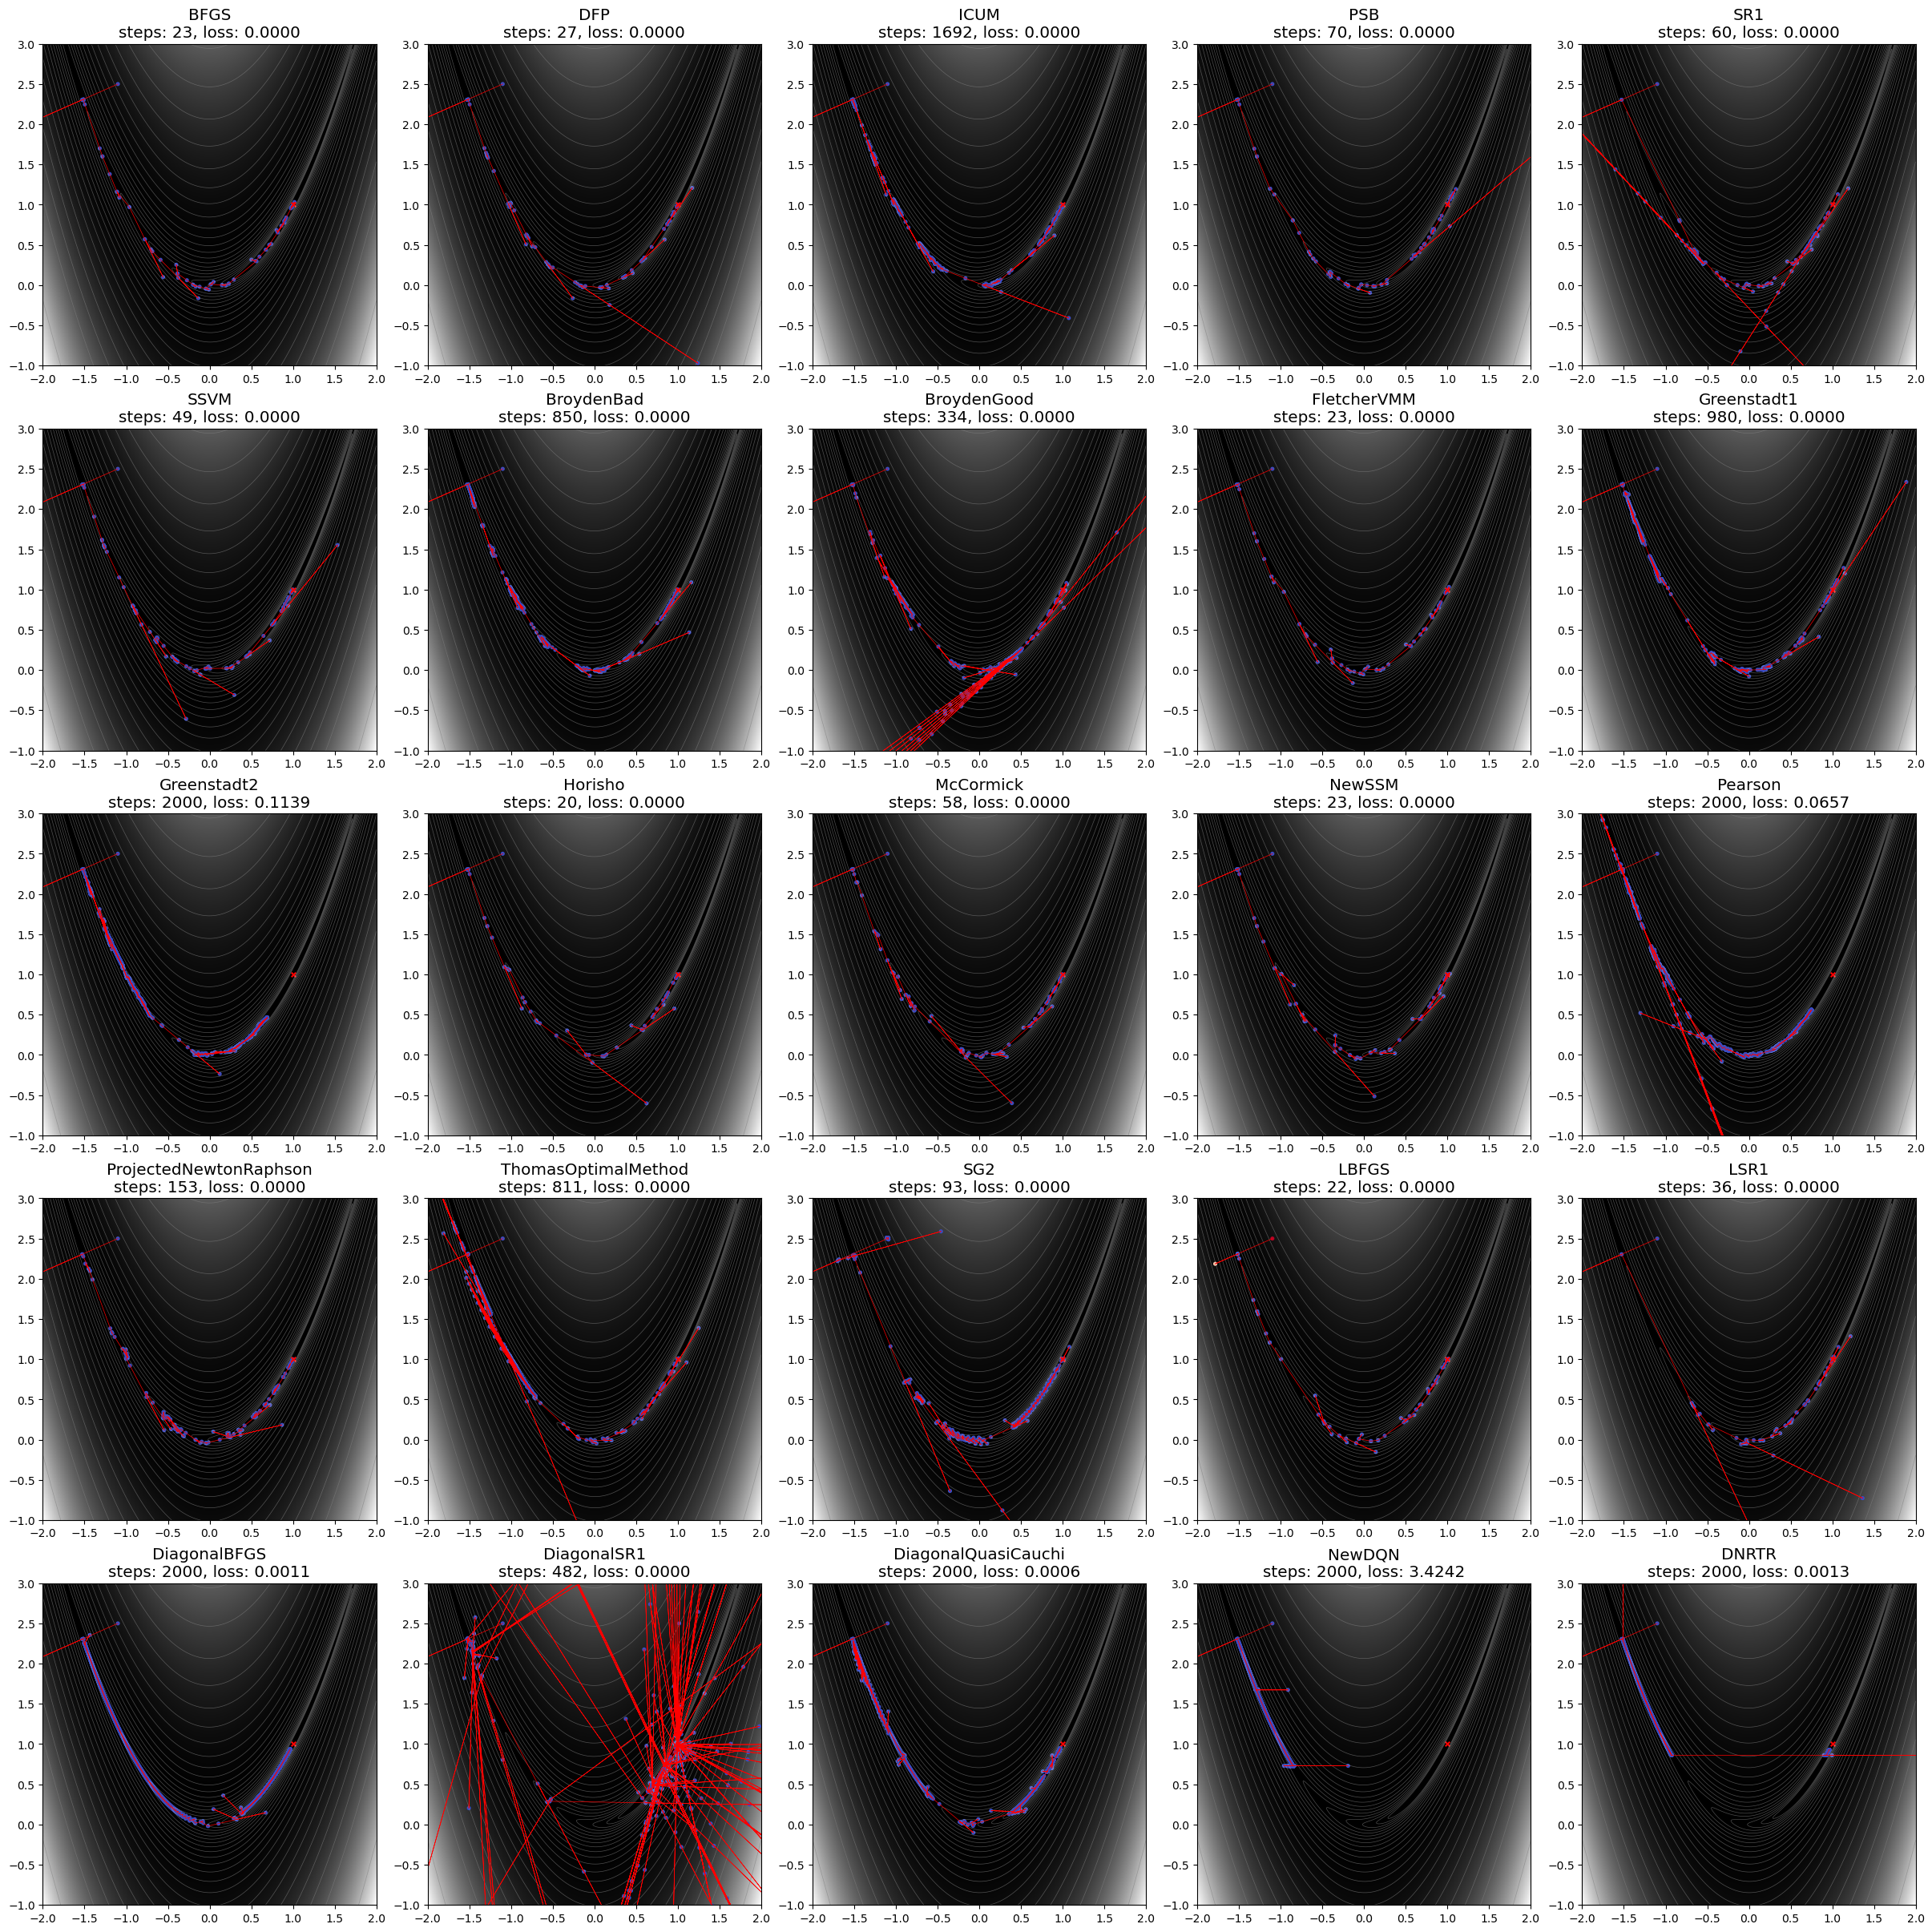

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torchzero as tz
import visualbench as vb

fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(24,24), layout='compressed')

axes = np.ravel(axes)
axes_iter = iter(axes)

for QN in (
    # full-matrix
    tz.m.BFGS(),
    tz.m.DFP(),
    tz.m.ICUM(),
    tz.m.PSB(),
    tz.m.SR1(),
    tz.m.SSVM(),
    tz.m.BroydenBad(),
    tz.m.BroydenGood(),
    tz.m.FletcherVMM(),
    tz.m.Greenstadt1(),
    tz.m.Greenstadt2(),
    tz.m.Horisho(),
    tz.m.McCormick(),
    tz.m.NewSSM(),
    tz.m.Pearson(),
    tz.m.ProjectedNewtonRaphson(),
    tz.m.ThomasOptimalMethod(),

    # stochastic
    tz.m.SG2(n_samples=2, beta=0.9),

    # limited-memory
    tz.m.LBFGS(),
    tz.m.LSR1(),

    # diagonal
    tz.m.DiagonalBFGS(),
    tz.m.DiagonalSR1(),
    tz.m.DiagonalQuasiCauchi(),
    tz.m.NewDQN(),
    tz.m.DNRTR(),
    ):

    func = vb.FunctionDescent("rosen").set_print_inverval(None)

    optimizer = tz.Optimizer(
        func.parameters(),
        tz.m.RestartOnStuck(QN),
        tz.m.StrongWolfe(c2=0.1, fallback=True),
    )

    func.run(optimizer, max_steps=2000, target_loss=1e-5)

    ax = next(axes_iter)
    func.plot(log_contour=True, ax=ax)
    ax.set_title(f"{QN.__class__.__name__}\nsteps: {func.num_steps}, loss: {func.lowest_loss:.4f}", fontsize="x-large")


plt.show()